Results for LogisticRegression on Original
Accuracy: 0.9932082794307892
Confusion Matrix:
 [[3904    4]
 [  38 2238]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9904    0.9990    0.9946      3908
           1     0.9982    0.9833    0.9907      2276

    accuracy                         0.9932      6184
   macro avg     0.9943    0.9911    0.9927      6184
weighted avg     0.9933    0.9932    0.9932      6184

Results for LogisticRegression on RUS Balanced
Accuracy: 0.9918734900065891
Confusion Matrix:
 [[2274    3]
 [  34 2242]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9853    0.9987    0.9919      2277
           1     0.9987    0.9851    0.9918      2276

    accuracy                         0.9919      4553
   macro avg     0.9920    0.9919    0.9919      4553
weighted avg     0.9920    0.9919    0.9919      4553

Results for LogisticRegression on ROS Balanced
Accuracy: 0

C:\Users\yash sojitra\AppData\Local\Temp\ipykernel_48736\2478520971.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='accuracy', data=results_df, palette='coolwarm')


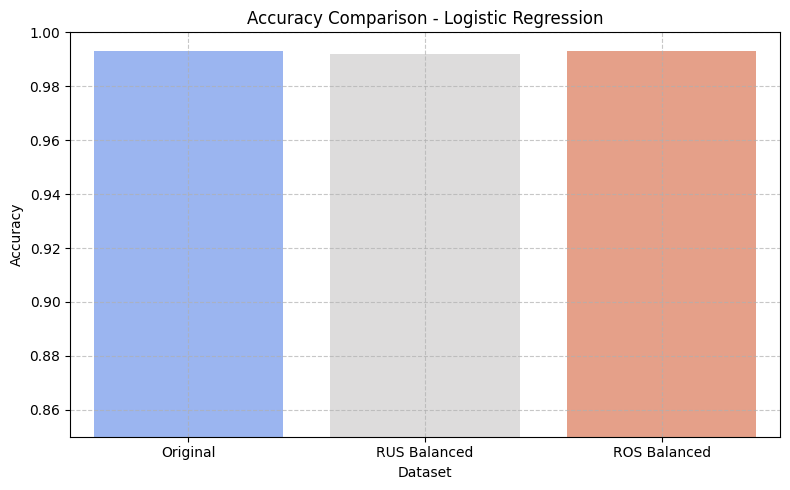

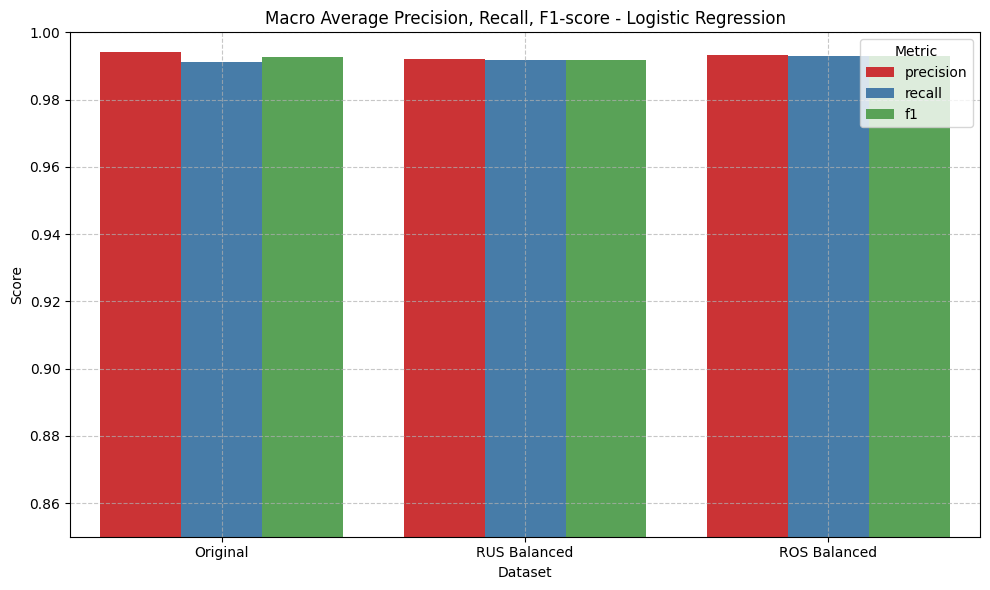

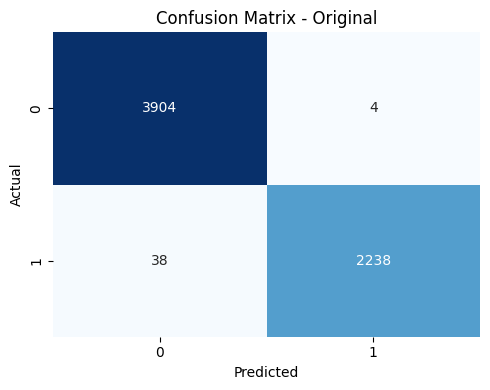

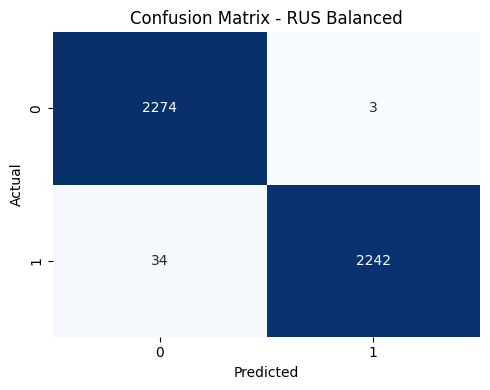

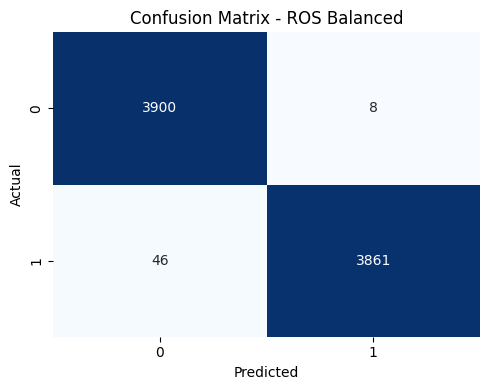

In [2]:
# === Import required libraries ===
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# === Store results for visualization ===
results = []

# === Model evaluation function with result collection ===
def run_model_with_results(dataset_path, model, vectorizer, label):
    # Load dataset
    df = pd.read_csv(dataset_path)
    X = df['Query']
    y = df['Label']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # TF-IDF Vectorization
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Train the model
    model.fit(X_train_vec, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_vec)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save results
    results.append({
        'label': label,
        'accuracy': acc,
        'conf_matrix': cm,
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        'f1': report['macro avg']['f1-score']
    })

    # Print results
    print("=" * 80)
    print(f"Results for {model.__class__.__name__} on {label}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
    print("=" * 80)

# === Set up vectorizer and Logistic Regression model ===
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 6), max_features=5000)
model = LogisticRegression(max_iter=1000)

# === Run the model on datasets ===
run_model_with_results("../../Dataset/Raw/SQLi_Original_Raw.csv", model, vectorizer, "Original")
run_model_with_results("../../Dataset/Raw/SQLi_RUS_Raw.csv", model, vectorizer, "RUS Balanced")
run_model_with_results("../../Dataset/Raw/SQLi_ROS_Raw.csv", model, vectorizer, "ROS Balanced")

# === Visualization ===

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# 1. Accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='label', y='accuracy', data=results_df, palette='coolwarm')
plt.title('Accuracy Comparison - Logistic Regression')
plt.ylim(0.85, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Macro Precision, Recall, F1-score
plt.figure(figsize=(10, 6))
metrics_df = results_df.melt(id_vars='label', value_vars=['precision', 'recall', 'f1'],
                             var_name='Metric', value_name='Score')
sns.barplot(data=metrics_df, x='label', y='Score', hue='Metric', palette='Set1')
plt.title('Macro Average Precision, Recall, F1-score - Logistic Regression')
plt.ylim(0.85, 1.0)
plt.ylabel('Score')
plt.xlabel('Dataset')
plt.legend(title='Metric')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Confusion matrices
for res in results:
    cm = res['conf_matrix']
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {res['label']}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()